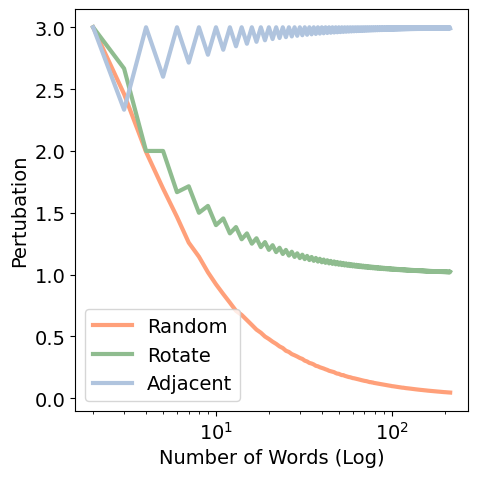

In [27]:
import seaborn as sns
import random


def altering_order(altering='ex_random_two', L=8):
    raw_list = list(range(L))
    new_list = list(range(L))
    if altering == 'ex_random_two':
        i1, i2 = 0, 0
        while i1 == i2:
            i1 = random.randint(0, L - 1)
            i2 = random.randint(0, L - 1)
        t = new_list[i1]
        new_list[i1] = new_list[i2]
        new_list[i2] = t
    elif altering == 'ex_adjacent':
        new_i = []
        for i in range(L // 2):
            t = [2 * i + 1, 2 * i]
            new_i.extend(t)
        if L % 2 == 1:
            new_i.append(L - 1)
        new_list = [raw_list[i] for i in new_i]
    elif altering == 'rotate_two_part':
        anchor_index = L // 2

        left_part = raw_list[:anchor_index]
        right_part = raw_list[-anchor_index:]
        new_list = right_part + raw_list[anchor_index:-anchor_index] + left_part

    return raw_list, new_list


def calculate_changes(old_position_ids, new_position_ids):
    absolute_change = sum([1 for old_id, new_id in zip(old_position_ids, new_position_ids) if old_id != new_id])
    
    relative_change = 0
    for idx, i in enumerate(new_position_ids):
        original_prev, original_after = i - 1, i + 1
        if idx > 0 and idx < len(new_position_ids)-1:
            if original_prev != new_position_ids[idx-1]:
                relative_change += 1
            if original_after != new_position_ids[idx+1]:
                relative_change += 1
        elif idx == 0:
            if new_position_ids[idx] != old_position_ids[idx]:
                relative_change += 1
            if original_after != new_position_ids[idx+1]:
                relative_change += 1
        else:
            if new_position_ids[idx] != old_position_ids[idx]:
                relative_change += 1
            if original_prev != new_position_ids[idx-1]:
                relative_change += 1
    
    return relative_change, absolute_change

def compute_rel_distance(altering='ex_random_two', L=8):
    raw_list, new_list = altering_order(altering, L)
    relative_change, absolute_change = calculate_changes(raw_list, new_list)

    return absolute_change, relative_change

#     abs_distance_list = [abs(new_list[i] - raw_list[i]) for i in range(L)]
#     abs_distance = sum(abs_distance_list) / L

#     rel_distance_list = []
#     for i in range(1, L):
#         gap = new_list[i] - new_list[i-1]
#         if gap == 1:
#             rel_distance_list.append(0)
#         else:
#             rel_distance_list.append(1)
#     rel_distance = sum(rel_distance_list) / len(rel_distance_list)

#     return abs_distance, rel_distance


if __name__ == "__main__":
    l_abs_list_1, l_rel_list_1 = [], []
    l_abs_list_2, l_rel_list_2 = [], []
    l_abs_list_3, l_rel_list_3 = [], []
    L_list = list(range(2, 216))
    for L in L_list:
        perb1 = []
        for _ in range(100):
            abs_distance, rel_distance = compute_rel_distance(altering='ex_random_two', L=L)
            perb1.append((abs_distance+rel_distance)/L)
        l_mean_perb1 = sum(perb1) / len(perb1)
        l_abs_list_1.append(l_mean_perb1)


        perb2 = []
        for _ in range(100):
            abs_distance, rel_distance = compute_rel_distance(altering='rotate_two_part', L=L)
            perb2.append((abs_distance+rel_distance)/L)
        l_mean_perb2 = sum(perb2) / len(perb2)
        l_abs_list_2.append(l_mean_perb2)

        perb3 = []
        for _ in range(100):
            abs_distance, rel_distance = compute_rel_distance(altering='ex_adjacent', L=L)
            perb3.append((abs_distance+rel_distance)/L)
        l_mean_perb3 = sum(perb3) / len(perb3)
        l_abs_list_3.append(l_mean_perb3)


    import matplotlib.pyplot as plt
    bar_colors = ['linen', 'lightsteelblue', 'mistyrose' ]
    # Create a figure with two subplots
    fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
    plt.rcParams['font.size'] = 14
    # Subplot for relative distances
    # ax1.plot(L_list, l_rel_list_1, label='ex random two', linewidth=3, color='bisque')
    # ax1.plot(L_list, l_rel_list_2, label='rotate two part', linewidth=3, color='darkseagreen')
    # ax1.plot(L_list, l_rel_list_3, label='ex adjacent', linewidth=3, color='powderblue')
    # ax1.set_xlabel('Number of Words', fontsize=14)
    # ax1.set_ylabel('Mean Relative Distance', fontsize=14)
    # ax1.legend()

    # Subplot for absolute distances
    ax2.plot(L_list, l_abs_list_1, label='Random', linewidth=3, color='lightsalmon')
    ax2.plot(L_list, l_abs_list_2, label='Rotate', linewidth=3, color='darkseagreen')
    ax2.plot(L_list, l_abs_list_3, label='Adjacent', linewidth=3, color='lightsteelblue')
    ax2.set_xlabel('Number of Words (Log)', fontsize=14)
    ax2.set_ylabel('Pertubation', fontsize=14)
    # ax2.set_ylim([0, 8])
    ax2.set_xscale('log')
    ax2.legend()

    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

    # Adjust subplot spacing
    plt.tight_layout()
    plt.savefig('perturb.pdf', dpi=800)
    # Show the figure
    plt.show()
